## Titanic: Machine Learning from Disaster
### Start here! Predict survival on the Titanic and get familiar with ML basics
https://www.kaggle.com/c/titanic

Perform a Binary classification

The data has been split into two groups:

**training set (train.csv)**

**test set (test.csv)**

The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenge

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

#### Data Dictionary

| Variable | Definition | Key |
| --- | --- | --- |
| survival | Survival | 0 = No, 1 = Yes |
| pclass | Ticket class |	1 = 1st, 2 = 2nd, 3 = 3rd
| sex |	Sex	
| Age | Age in years	
| sibsp | # of siblings / spouses aboard the Titanic	
| parch | # of parents / children aboard the Titanic	
| ticket | Ticket number	
| fare | Passenger fare	
| cabin	| Cabin number	
| embarked | Port of Embarkation | C = Cherbourg, Q = Queenstown, S = Southampton

#### Variable Notes

**pclass** : A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

**age**: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**sibsp**: The dataset defines family relations in this way...

Sibling = brother, sister, stepbrother, stepsister

Spouse = husband, wife (mistresses and fiancés were ignored)

**parch**: The dataset defines family relations in this way...

Parent = mother, father

Child = daughter, son, stepdaughter, stepson

Some children travelled only with a nanny, therefore parch=0 for them.

In [1]:
#!pip list
#!pip freeze
import sklearn
sklearn.__version__

'0.18.1'

In [2]:

PATH='Data/'

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import Imputer # to replace the NaN
from sklearn import metrics 
from sklearn import tree # decsion treees
import matplotlib.pyplot as plt
%matplotlib inline

### Data load
Load the data 

In [4]:
#f'{PATH}titanic.csv'
df_train=pd.read_csv(f'{PATH}titanic.csv')

In [5]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
#sex is male or female, replace this with 1 or 0. 1 for male and 0 female
df_train['Sex_1']=df_train['Sex'].apply(lambda x: 1 if x=='male' else 0)

In [7]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_1
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [38]:
df_train[df_train['Fare'] <23.0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_1
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,0
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,0
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S,1
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S,0
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S,0


In [8]:
df_train.shape

(891, 13)

In [109]:
#Do the feature selection
#feature vector
#Parch is not required, as it is not who is whose brother or father
columns=['Fare','Sex_1','Age']
feature_selection=df_train[columns]
#'SibSp'
#'Parch'
#'Fare',

#outcome
y=lables=targets=df_train['Survived']



In [217]:
#check for feature values
feature_selection.shape

(891, 3)

In [111]:
#from describe you can see that Age has 891-714=33 records less and has NaB value
feature_selection.describe()

,Fare,Sex_1,Age
count,891.000000,891.000000,714.000000
mean,32.204208,0.647587,29.699118
std,49.693429,0.477990,14.526497
min,0.000000,0.000000,0.420000
25%,7.910400,0.000000,20.125000
50%,14.454200,1.000000,28.000000
75%,31.000000,1.000000,38.000000
max,512.329200,1.000000,80.000000


### Checking for NaN values

In [112]:

# Check if there are any null values 

# Option 1: use isnull().values.any() or use isnull().any().any() 
# This returns a boolean value

%time feature_selection.isnull().values.any()

Wall time: 1 ms


True

In [113]:
# Option 2 use isnull().any() or isnull().sum() or 
# This returns that have NaN values:
%time print (feature_selection.isnull().any())

Fare     False
Sex_1    False
Age       True
dtype: bool
Wall time: 2 ms


In [114]:
#Check if NaN values exists in a column, then the give a summary of the same for all columns
%time print (feature_selection.isnull().any().any())

True
Wall time: 2 ms


In [115]:
# To know number of null values for each column
%time print (feature_selection.isnull().sum())

Fare       0
Sex_1      0
Age      177
dtype: int64
Wall time: 3 ms


In [116]:
#To find the total null values
#first giving a summation of the number of NaN values in a column, then the summation of those values:
%time print (feature_selection.isnull().sum().sum())

177
Wall time: 1 ms


In [117]:
#To find out which rows have NaNs in a specific column:
nan_rows = feature_selection[feature_selection['Age'].isnull()]

In [118]:
nan_rows.head()

,Fare,Sex_1,Age
5,8.4583,1,NaN
17,13.0000,1,NaN
19,7.2250,0,NaN
26,7.2250,1,NaN
28,7.8792,0,NaN


In [119]:
## Other ways

In [120]:
feature_selection.isnull().T.any()
nan_rows = feature_selection[feature_selection.isnull().T.any().T]
nan_rows.head()

,Fare,Sex_1,Age
5,8.4583,1,NaN
17,13.0000,1,NaN
19,7.2250,0,NaN
26,7.2250,1,NaN
28,7.8792,0,NaN


#### Replacing NaN with Avg using Skilearn Imputer

In [121]:
# if you want to replace NaN for a specific column then you convert that column as a 2D array
print(feature_selection['Age'].shape)
print(feature_selection[['Age']].shape)

(891,)
(891, 1)


In [122]:
# axis=0 refers to the column, meaning the mean of the column
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
transformedAge = imp.fit_transform(feature_selection[['Age']])
#X

In [123]:
#Check the shape of X
print(transformedAge.shape)
# check the shape of Age
print(feature_selection[['Age']].shape)

feature_selection[['Age']]=transformedAge
#Verify if there are any nulls
feature_selection[feature_selection['Age'].isnull()]

(891, 1)
(891, 1)


D:\Mallikarjun\UPXAcademylearning\Anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\Mallikarjun\UPXAcademylearning\Anaconda\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Fare,Sex_1,Age


### Creating the decision tree

In [211]:
feature_selection.head(5)

,Fare,Sex_1,Age
0,7.2500,1,22.0
1,71.2833,0,38.0
2,7.9250,0,26.0
3,53.1000,0,35.0
4,8.0500,1,35.0


In [145]:
# train based on the tesrt data set
decisionTree=tree.DecisionTreeClassifier(criterion='entropy',max_depth=3)
mytree=decisionTree.fit(feature_selection,y)

In [146]:
mytree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [147]:
print(mytree.feature_importances_)

[0.29326315 0.50788094 0.19885592]


In [148]:
check=zip(columns,mytree.feature_importances_)

In [149]:
print(tuple(check))

(('Fare', 0.29326314716879925), ('Sex_1', 0.5078809351756948), ('Age', 0.198855917655506))


In [150]:
check

In [151]:
list(zip(columns,mytree.feature_importances_))

[('Fare', 0.29326314716879925),
 ('Sex_1', 0.5078809351756948),
 ('Age', 0.198855917655506)]

## Visualize the decision tree

In [152]:
with open('titanic.dot','w') as f:
    f=tree.export_graphviz(mytree,out_file=f,feature_names=columns)
    print (f)

None


#### visit http://webgraphviz.com/  to visualize the tree

In [153]:
#feature_selection
    prediction=mytree.predict(feature_selection)

In [212]:
feature_selection.head(5)

,Fare,Sex_1,Age
0,7.2500,1,22.0
1,71.2833,0,38.0
2,7.9250,0,26.0
3,53.1000,0,35.0
4,8.0500,1,35.0


array([[468,  81],
       [ 92, 250]])

In [208]:
prediction.shape

(891,)

In [209]:
y.shape

(891,)

In [154]:
confusion_matrix=metrics.confusion_matrix(y,prediction)
confusion_matrix

array([[496,  53],
       [ 91, 251]])

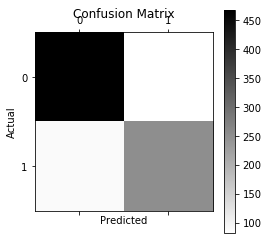

In [108]:
def plot_confusion_matrix(df_confusion, title='Confusion matrix', cmap=plt.cm.gray_r):
    plt.matshow(df_confusion, cmap=cmap) # imshow
    plt.title('Confusion Matrix')
    plt.colorbar()
    plt.ylabel('Actual')
    plt.xlabel('Predicted')

plot_confusion_matrix(confusion_matrix)

### Test on Test data

In [215]:
features_test.shape

(418, 3)

In [218]:
# We do not have Survived column in the test dataset, so we can see the  confusion matrix on the test data.

In [213]:
# Perform the test on the test dataset
#load the dataset
print (f'{PATH}')
df_test = pd.read_csv(f'{PATH}titanic_test.csv')


# Create the Sex_1 coluumn and then impute the age column
df_test['Sex_1']=df_test['Sex'].apply(lambda x: 1 if x=='male' else 0)

#features column to test
features_test=df_test[columns]

#Check for the NaN values
#features_test.isnull().sum()
features_test.head(5)

        #impute the NaN values
        

Data/


,Fare,Sex_1,Age
0,7.8292,1,34.5
1,7.0000,0,47.0
2,9.6875,1,62.0
3,8.6625,1,27.0
4,12.2875,0,22.0


In [214]:
features_test.shape

(418, 3)

In [201]:
# axis=0 refers to the column, meaning the mean of the column
imp_test=Imputer(missing_values='NaN',strategy='mean',axis=0)
features_test=imp_test.fit_transform(features_test)


In [202]:
predict_test=mytree.predict(features_test)

In [216]:
y.shape
features_test.shape

(418, 3)

## Bagging Approach

In [289]:
from sklearn.ensemble import BaggingClassifier
Bagging=BaggingClassifier(n_estimators=10,max_features=feature_selection.shape[1])
#n_estimators=10,max_features=feature_selection.shape[1]
#max_samples=10.1,

In [290]:
Model=Bagging.fit(feature_selection,y)

In [291]:
int(Model.score(feature_selection, y))

0

In [292]:
Bag_prediction=Model.predict(feature_selection)

In [293]:
Bag_confusion=metrics.confusion_matrix(y,Bag_prediction)
Bag_confusion

array([[536,  13],
       [ 24, 318]])

In [294]:
Bag_confusion=metrics.confusion_matrix(y,Bag_prediction)
Bag_confusion

array([[536,  13],
       [ 24, 318]])

## Random Forest

In [242]:
from sklearn.ensemble import RandomForestClassifier
Modelforest=RandomForestClassifier(max_depth=10,criterion='entropy',n_estimators=100,min_samples_split=2,random_state=1)

In [243]:
myforest=Modelforest.fit(feature_selection,y)

In [246]:
singletree=Modelforest.estimators_[5]

In [247]:
from sklearn.tree import export_graphviz
export_graphviz(singletree,out_file='RF_titanic.dot',feature_names=columns,label='all')

In [249]:
#from subprocess import call
#call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])
import os
os.system('dot -Tpng RF_titanic.dot -o RF_titanic.png')

1

In [223]:
print(myforest.score(feature_selection, y))

0.9102132435465768


In [228]:
Rf_prediction=myforest.predict(feature_selection)

In [229]:
list(zip(columns,myforest.feature_importances_))

[('Fare', 0.41121961011473446),
 ('Sex_1', 0.2989190082658579),
 ('Age', 0.28986138161940783)]

In [230]:
Random_confusion=metrics.confusion_matrix(y,Rf_prediction)

In [231]:
Random_confusion

array([[523,  26],
       [ 54, 288]])